# Setup Part

In [83]:
# Import Library
import numpy as np
import pandas as pd
from scipy import stats as st
import statistics as stat
import math

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [84]:
# Function to retrieve critical value from t-table
def get_t_table(alpha, tail, dof):
    if tail == 2:
        alpha /= 2
    return st.t.isf([alpha], [dof])[0]

In [85]:
# Gather the Data
url = 'https://raw.githubusercontent.com/jasonmiracleg/Ice_Cream_Hypothesis_Testing/main/Dataset/Ice_Cream_Franchise.csv'
original_df = pd.read_csv(url, sep=',')
original_df.head()

,Franchise Name,City,Country,Number of Employees,Revenue,Profit,Expenses,Customer Satisfaction Score,Marketing Spent,Pre-Marketing Visitors,Post-Marketing Visitors
0,Ice Cream World,Istanbul,Turkey,25,50000,15000,35000,8,5000,2000,3000
1,Chill Ice Cream,Ankara,Turkey,20,45000,12000,33000,7,4500,1800,2500
2,Sweet Scoops,Izmir,Turkey,18,42000,11000,31000,7,4000,1700,2400
3,Frozen Delights,Bursa,Turkey,15,38000,10000,28000,6,3500,1500,2200
4,Sundae Haven,Adana,Turkey,12,35000,9000,26000,6,3000,1400,2000


# Managing the Data

## One Sample

### The 30 Italia franchises have maintained their customer service very well which makes them reach customer satisfaction scores above 8.2.

In [86]:
df_italy = original_df[original_df['Country'] == 'Italy']
df_italy.head()

,Franchise Name,City,Country,Number of Employees,Revenue,Profit,Expenses,Customer Satisfaction Score,Marketing Spent,Pre-Marketing Visitors,Post-Marketing Visitors
30,Gelato Italia,Rome,Italy,30,55000,16000,39000,9,5500,2100,3200
31,Italian Ice Cream,Milan,Italy,25,52000,15000,37000,8,5200,2000,3100
32,Dolce Gelato,Florence,Italy,22,49000,14000,35000,8,4900,1900,3000
33,Gusto Gelateria,Venice,Italy,20,46000,13000,33000,7,4600,1800,2900
34,Bellissimo Gelato,Naples,Italy,18,43000,12000,31000,7,4300,1700,2800


In [87]:
Xbar_italia = np.mean(df_italy['Customer Satisfaction Score'])
std_italia = np.std(df_italy['Customer Satisfaction Score'], ddof = 1)
print('the average of the customer satisfaction is', Xbar_italia)
print('the standard deviation is', std_italia)

the average of the customer satisfaction is 3.5483870967741935
the standard deviation is 2.419899580250102


### The average number of employees that is needed to run the ice cream franchise is  greater than 15.

In [88]:
Xbar_employee = np.mean(original_df['Number of Employees'])
frequent_number_of_employees = stat.mode(original_df['Number of Employees'])
average_employees_per_country = original_df.groupby('Country')['Number of Employees'].mean().reset_index()
average_employees_per_country['Number of Employees'] = np.ceil(average_employees_per_country['Number of Employees'])
std_employees = np.std(original_df['Number of Employees'], ddof = 1)
print("The standard deviation is", std_employees)
print("The average of recorded number of employees :", int(math.ceil(Xbar_employee)))
print("The most frequent number of employees :", frequent_number_of_employees)
print(average_employees_per_country)

The standard deviation is 8.323702423715513
The average of recorded number of employees : 8
The most frequent number of employees : 1
     Country  Number of Employees
0  Indonesia                  8.0
1      Italy                  8.0
2     Turkey                  6.0
3        USA                 10.0


## Two Sample

### The USA ice cream franchise has more average expenses than Indonesia’s.

In [89]:
expenses_of_USA = original_df[original_df['Country'] == 'USA']['Expenses'].values
expenses_of_Indonesia = original_df[original_df['Country'] == 'Indonesia']['Expenses'].values
final_expenses = pd.DataFrame({'USA_expenses' : expenses_of_USA, 'Indonesia_expenses': expenses_of_Indonesia})
final_expenses.head()

,USA_expenses,Indonesia_expenses
0,40000,39000
1,39000,37000
2,38000,35000
3,37000,33000
4,36000,31000


In [90]:
Xbar_USA = np.mean(expenses_of_USA)
Xbar_Indonesia = np.mean(expenses_of_Indonesia)
std_dev_sample_USA = np.std(expenses_of_USA, ddof=1)
std_dev_sample_Indonesia = np.std(expenses_of_Indonesia, ddof=1)
print("The average of expenses in USA is {:.2f}".format(Xbar_USA))
print("The average of expenses in Indonesia is {:.2f}".format(Xbar_Indonesia))
print("The standard deviation sample of USA's expenses is {:.2f}".format(std_dev_sample_USA))
print("The standard deviation sample of Indonesia's expenses is {:.2f}".format(std_dev_sample_Indonesia))

The average of expenses in USA is 23528.33
The average of expenses in Indonesia is 17730.00
The standard deviation sample of USA's expenses is 11319.40
The standard deviation sample of Indonesia's expenses is 9974.18


### There’s a significant difference between pre-marketing visitor and post-marketing visitor because of the marketing spend.

In [107]:
df_marketing = pd.DataFrame(original_df[['Pre-Marketing Visitors', 'Post-Marketing Visitors']])
df_marketing.head()

,Pre-Marketing Visitors,Post-Marketing Visitors
0,2000,3000
1,1800,2500
2,1700,2400
3,1500,2200
4,1400,2000


In [92]:
df_marketing['difference'] = df_marketing['Post-Marketing Visitors']-df_marketing['Pre-Marketing Visitors']
dbar_marketing = np.mean(df_marketing['difference'])
df_marketing['(d-dbar)'] = df_marketing.apply(lambda row: (row['difference']-dbar_marketing), axis=1)
df_marketing['(d-dbar)^2'] = df_marketing.apply(lambda row: (row['(d-dbar)'])**2, axis =1)
df_marketing.head()

,Pre-Marketing Visitors,Post-Marketing Visitors,difference,(d-dbar),(d-dbar)^2
0,2000,3000,1000,180.578512,32608.599139
1,1800,2500,700,-119.421488,14261.491701
2,1700,2400,700,-119.421488,14261.491701
3,1500,2200,700,-119.421488,14261.491701
4,1400,2000,600,-219.421488,48145.789222


# Data Visualization

### The 30 Italia franchises have maintained their customer service very well which makes them reach customer satisfaction scores above 8.2.

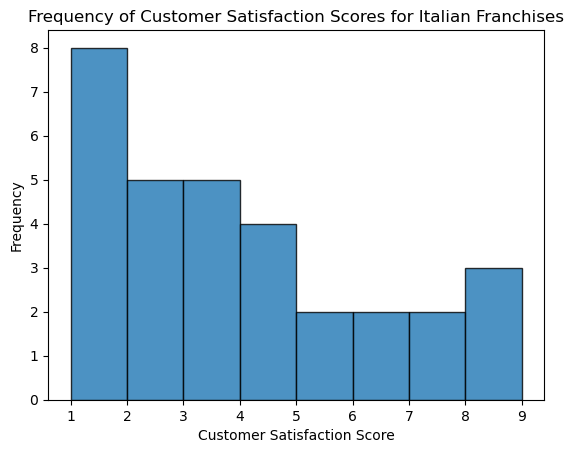

In [93]:
# Plot histogram of customer satisfaction scores
plt.hist(df_italy['Customer Satisfaction Score'], bins=8, alpha=0.8, edgecolor='black')

plt.xlabel('Customer Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Frequency of Customer Satisfaction Scores for Italian Franchises')

plt.show()

### The average number of employees that is needed to run the ice cream franchise is  greater than 15.

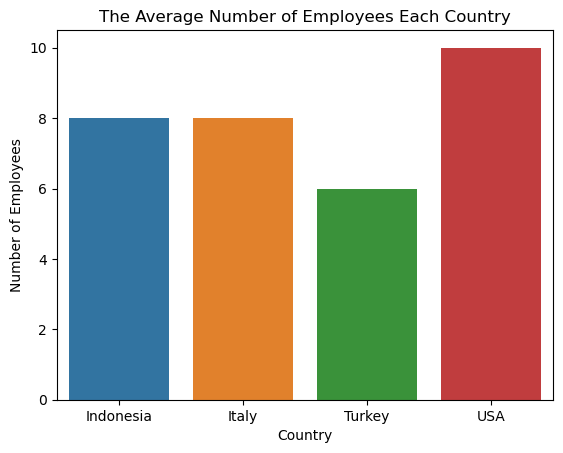

In [94]:
graph = sns.barplot(x=average_employees_per_country['Country'], y=average_employees_per_country['Number of Employees'], data=average_employees_per_country)
graph.set_title('The Average Number of Employees Each Country')
graph.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
graph.set_xticklabels(graph.get_xticklabels())
plt.show()

### The USA ice cream franchise has more average expenses than Indonesia’s.

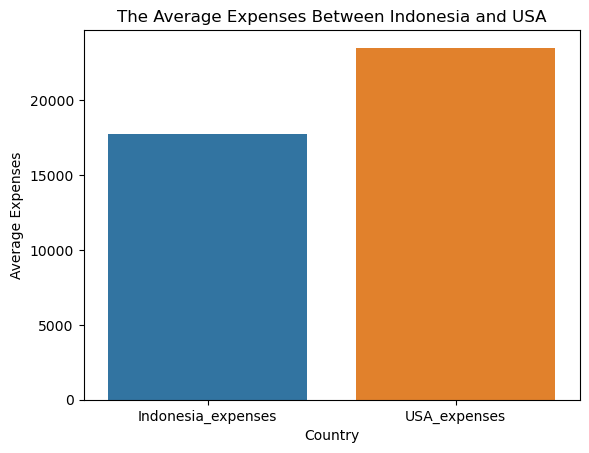

In [95]:
mean_expenses = final_expenses[['Indonesia_expenses', 'USA_expenses']].mean()

# Create a bar plot
bar_expenses = sns.barplot(x=mean_expenses.index, y=mean_expenses.values)
bar_expenses.set_title('The Average Expenses Between Indonesia and USA')
bar_expenses.set_ylabel('Average Expenses')
bar_expenses.set_xlabel('Country')
bar_expenses.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
plt.show()

### There’s a significant difference between pre-marketing visitor and post-marketing visitor because of the marketing spend.

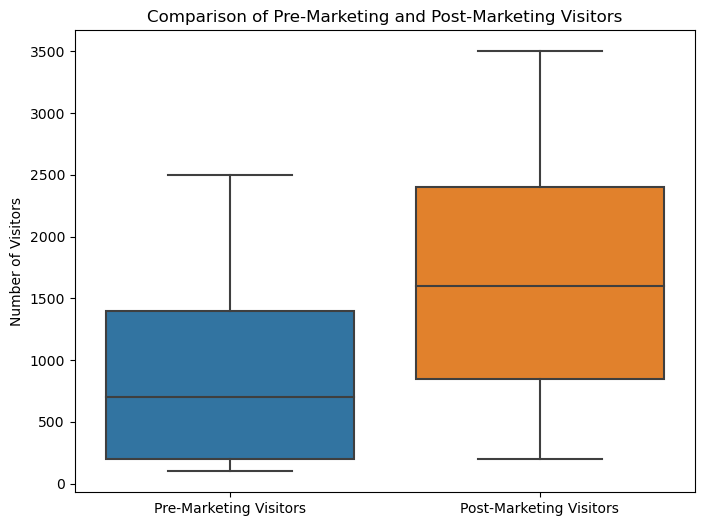

In [96]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_marketing[['Pre-Marketing Visitors', 'Post-Marketing Visitors']])
plt.title('Comparison of Pre-Marketing and Post-Marketing Visitors')
plt.ylabel('Number of Visitors')
plt.show()

# Hypothesis Testing

## Hypothesis One Sample Test

### The 30 Italia franchises have maintained their customer service very well which makes them reach customer satisfaction scores above 8.2

In [109]:
# Step 1 : State null and alternative hypothesis
# H0 : Miu <= 8.2
# H1 : Miu > 8.2

# Step 2 : Select level of significance and identify the known data
Miu = 8.2
n = 30
tail = 1
dof = n-1
alpha = 0.05

# Step 3 : Identify the test statistics
# Since this hypothesis only evaluates one sample, this test belongs to One Sample Test 
# Using the t-test because of the unknown population standard deviation

# Step 4 : Formulate a decision rule
# H0 is rejected if t_calc > t_table(alpha)

# Step 5 : Take a sample, arrive at decision
t_calc = (Xbar_italia - Miu) / (std_italia / np.sqrt(n))
t_table = get_t_table(alpha, tail, dof)
print("t_calculation = {:.2f}".format(t_calc))
print("t_table = {:.2f}".format(t_table))

# Step 6 : Interpret the result
if t_calc > t_table:
    print("H0 is rejected. The Italia ice cream franchises indeed reach customer satisfaction scores above 8.2")
else:
    print("Fail to Reject H0. The Italia ice cream franchises hasn't reached customer satisfaction scores above 8.2")

t_calculation = -10.53
t_table = 1.70
Fail to Reject H0. The Italia ice cream franchises hasn't reached customer satisfaction scores above 8.2


### The average number of employees that is needed to run the ice cream franchise is  greater than 15.

In [98]:
# Step 1 : State the null and alternate hypothesis
# H0 : Miu <= 15
# H1 : Miu > 15

# Step 2 : Select level of significance and identify the known data
alpha = 0.05
Miu = 15
tail = 1
n = original_df['Number of Employees'].count()
dof = n-1

# Step 3 : Identify the test statistics
# Since this test only involves one sample, thi test belongs to One Sample Test
# Using the t-test because of the unknown population standard deviation

# Step 4 : Formulate a decion rule
# Reject H0 if t_calc > t_table(alpha)

# Step 5 : Take a sample, arrive at decision
t_calc = (Xbar_employee - Miu) / (std_employees / np.sqrt(n))
t_table = get_t_table(alpha, tail, dof)
print('t_calculation = {:.2f}'.format(t_calc))
print('t_table = {:.2f}'.format(t_table))

# Step 6 : Interpret the result
if t_calc > t_table:
    print('H0 is rejected. The average number of employees that is needed is indeed greater than 15')
else:
    print('Fail to Reject H0. The average number of employees that is needed is below 15')

t_calculation = -9.86
t_table = 1.66
Fail to Reject H0. The average number of employees that is needed is below 15


## Hypothesis Two Sample Test

### There’s a significant difference between pre-marketing visitor and post-marketing visitor because of the marketing spend.

In [103]:
# Step 1 : State the null and alternate hypothesis
# H0 : Miu_pre_marketing == Miu_post_marketing
# H1 : Miu_pre_marketing != Miu_post_marketing

# Step 2 : Select level of significance and identify the known data
alpha = 0.05
tail = 2
n = len(df_marketing)
dof = n - 1
std_dev_sample_marketing = np.std(df_marketing['difference'], ddof=1)

# Step 3 : Identify the test statistics
# This belongs to two sample test (Dependent - Paired Sample)
# Using the t-test because of the unknown population standard deviation

# Step 4 : Formulate a decion rule
# Reject H0 if |t_calc| > t_table(alpha/2)

# Step 5 : Take a sample, arrive at decision
t_calc = dbar_marketing / (std_dev_sample_marketing / np.sqrt(n))
t_table = get_t_table(alpha, tail, dof)
print('t_calculation = {:.2f}'.format(t_calc))
print('t_table = {:.2f}'.format(t_table))

# Step 6 : Interpret the result
if np.abs(t_calc) > t_table:
    print('H0 is rejected. There is a significant difference between pre-marketing visitor and post-marketing visitor')
else:
    print('Fail to Reject H0. There is no significant difference between pre-marketing visitor and post-marketing visitor')

t_calculation = 28.54
t_table = 1.98
H0 is rejected. There is a significant difference between pre-marketing visitor and post-marketing visitor


### The USA ice cream franchise has more average expenses than Indonesia’s.

In [100]:
# Step 1 : State the null and alternate hypothesis
# H0 : Miu_USA <= Miu_Indonesia
# H1 : Miu_USA > Miu_Indonesia

# Step 2 : Select level of significance and identify the known data
alpha = 0.05
tail = 1
n = 20
dof = 2 * n - 2

std_dev_pooled_sample= ((n -1) * np.power(std_dev_sample_Indonesia, 2) + (n-1) * np.power(std_dev_sample_USA, 2))/ dof

# Step 3 : Identify the test statistics
# This belongs to two sample test (Independent - Unknown Population Standard Deviations)
# Using the t-test because of the unknown population standard deviation

# Step 4 : Formulate a decion rule
# Reject H0 if t_calc > t_table(alpha)

# Step 5 : Take a sample, arrive at decision
t_calc = (Xbar_USA - Xbar_Indonesia) / np.sqrt(std_dev_pooled_sample * (1/n + 1/n))
t_table = get_t_table(alpha, tail, dof)
print('t_calculation = {:.2f}'.format(t_calc))
print('t_table = {:.2f}'.format(t_table))

# Step 6 : Interpret the result
if t_calc > t_table:
    print("H0 is rejected. The average expenses of USA is indeed greater than Indonesia's")
else:
    print("Fail to Reject H0. The average expenses of USA is less than Indonesia's")

t_calculation = 1.72
t_table = 1.69
H0 is rejected. The average expenses of USA is indeed greater than Indonesia's
